In [77]:
import numpy as np
import pandas as pd
import scipy as sc
import math 
import matplotlib.pyplot as plt
from random import random


# Part A: Part A: Winning elections by spending more on campaigns?

### Loading Data: (data3a.xls)

In [78]:
dataColumns = ['state','district', 'democA', 'voteA', 'expendA', 'expendB', 'prtystrA', 'lexpendA', 'lexpendB', 'shareA']
df = pd.read_excel(r'C:\Users\bramg\Documents\data3a.xls', header=None, names=dataColumns)
#df.to_excel(r'C:\Users\bramg\Documents\rawdata3a.xls')

### Descriptive Analysis:


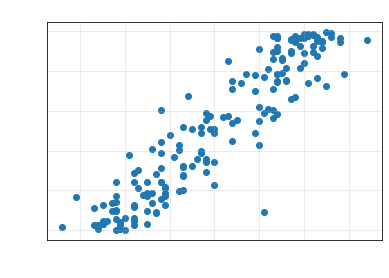

In [81]:
#plotting voting percentage against spending percentage
vX = df.filter(items=['voteA']).values.reshape(1,-1)
vY = df.filter(items=['shareA']).values.reshape(1,-1)


plt.scatter(vX[0], vY[0])
plt.title("Voting percentage against expenditure percentage").set_color('White')
plt.xlabel("Voting Share A ").set_color('White')
plt.ylabel("Expenditure Share A").set_color('White')
plt.grid(alpha=0.3)
plt.tick_params(colors='white')


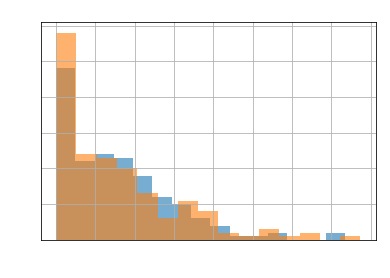

Descriptive Statistics for expenditure A:
count     173.000000
mean      305.088497
std       306.278015
min         0.930000
25%        60.050000
50%       221.530000
75%       450.720000
max      1548.190000
Name: expendB, dtype: float64


In [83]:
#Histogram
vX = df.iloc[:,4].values.reshape(1,-1)
vY = df.iloc[:,5].values.reshape(1,-1)

plt.hist(vX[0], alpha=0.6, bins=15)
plt.hist(vY[0], alpha=0.6, bins=15)
plt.grid()
plt.title('Histogram Expenditure A and B').set_color('White')
plt.xlabel('Amount Spended').set_color('White')
plt.ylabel('Quantity').set_color('White')
plt.tick_params(colors='white')
plt.show()

#descriptive statistics
print('Descriptive Statistics for expenditure A:')
print(df.iloc[:,5].describe())